In [ ]:
%pip install upsetplot

In [2]:
# Okay, so. What do I need to do and what output do I need?
# Read through each cluster and identify which populations are present within it.
# Have a simple counter for each population, maybe just boolean values.
# Then at the end of each cluster loop, add that to an overall counter of intersections. 
# Then compare that counter to a list of all possible intersections to find the value of each intersection.
# I could also maybe do a percentage - like what percentage of contigs are from each popualtion in each cluster?
# But that will be later.

import numpy
from itertools import combinations
import csv
import matplotlib
import upsetplot
from upsetplot import from_memberships, plot

In [ ]:
# Getting all the different intersections of populations.

combos = []
populations = ["BantuNC", "CARF", "CWNC", "EAAA", "EANS", "FWNC", "KhoeSan"]
for i in range(1,8):
    new = []
    new = list(combinations(populations, i))
    combos.extend(new)

print (combos)
print (len(combos))

# Now create a corresponding count list of all the intersection counts.
# Should be the same length.

counts = []
for intersection in combos:
    counts.append(0)

In [5]:
# Read in all sample data to get their population information.

file = open('ALLSAMPLES.csv', encoding = 'utf-8')
csv_metadata = csv.reader(file, delimiter = ',')
sampledata = list(csv_metadata)

popdict = {}
for sample in sampledata[1:]:
    sampleid = sample[0].split(";")[0]
    population = sample[0].split(";")[5]
    population = population.strip()
    popdict[sampleid] = population

popspresent = []
with open ("/cbio/projects/008/jess/HUPANrun/AfricanPanGenome/all/12_finalpangenome/cluster_info.txt", 'r') as f:
    for line in f:
        if ">" in line: # Cluster heading, reset everything
            if popspresent: # Check if list has items in it (whereby it will be True), which we must add to our records.
                
                sortedpops = sorted(popspresent) # Alphabetical order so it's the same as in combos
                popstuple = tuple(sortedpops) # Make it into tuple

                # Now find the position of that tuple in combos, and increase the count in counts.
                index = combos.index(popstuple)
                counts[index] = counts[index] + 1
                popspresent = [] # Reset it to empty
            else:
                continue
        else: # Now we're inside a cluster
            part = line.split(", ")[1]
            sampid = part.split(":")[0] # Find the sample ID
            samppopulation = popdict[sampid] # And its associated population
            if samppopulation not in popspresent:
                popspresent.append(samppopulation)

# Now outside the loop, but still need to add the last cluster to the data. So repeat the code above.

sortedpops = sorted(popspresent) # Alphabetical order so it's the same as in combos
popstuple = tuple(sortedpops) # Make it into tuple

# Now find the position of that tuple in combos, and increase the count in counts.
index = combos.index(popstuple)
counts[index] = counts[index] + 1

<ipython-input-8-1049d9bbee5b>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('APGUpset.svg', format='svg', dpi=1200)


<Figure size 432x288 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


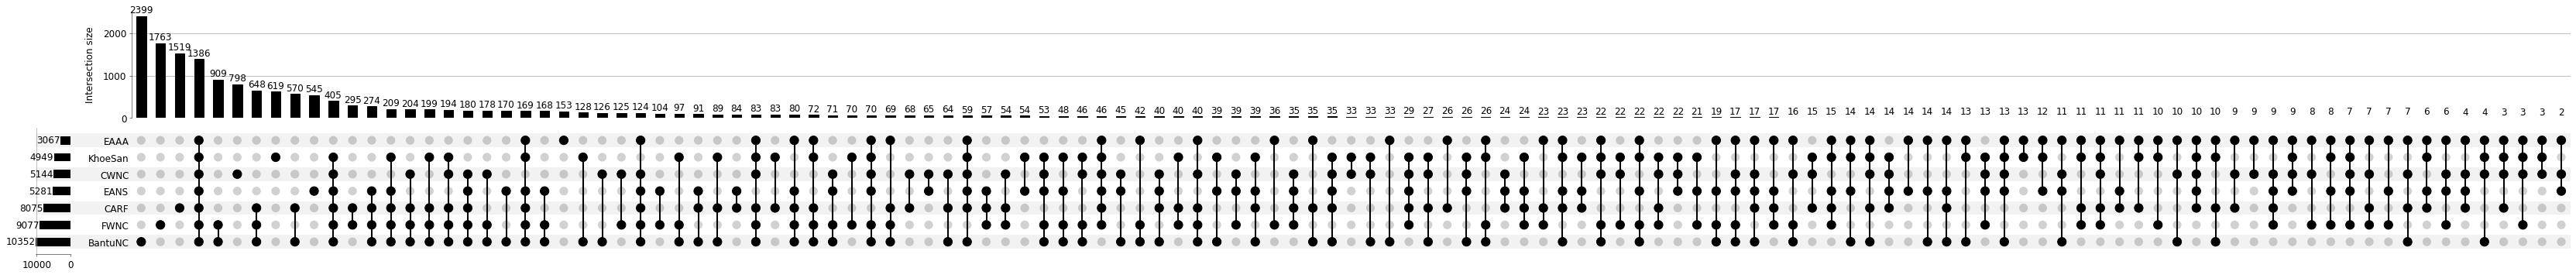

In [8]:
import matplotlib.pyplot as plt
plt.style.use("~/.matplotstyle/scientific.mplstyle")
fig1 = plt.figure()

upset = from_memberships(combos, counts)
plot(upset, sort_by='cardinality', show_counts=True)
#plt.savefig('APGUpset.svg', format='svg', dpi=1200)